<a href="https://colab.research.google.com/github/sahibpreetsingh12/100daysofcode/blob/master/SNCRC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
import tensorflow as tf
from keras.preprocessing.image import load_img , img_to_array
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import print_summary, to_categorical
import sys
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tqdm

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!unzip gdrive/My\ Drive/Samples_old.zip
!cp -r  /content/gdrive/My\ Drive/trainnote /content/


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# **Training Model**

In [0]:

num_classes = 3
epochs = 10
IMG_SIZE = 160

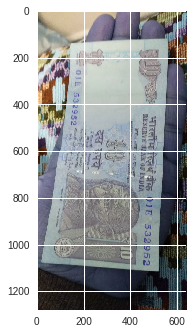

In [81]:
DATADIR = "/content/trainnote"

CATEGORIES = ["10"	, "20" , "others" ]
#print(len(CATEGORIES))
for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)
    
    for img in os.listdir(path):  # iterate over each image 
        if img.endswith(".jpg"):
          img_array = cv2.imread(os.path.join(path,img) )  # convert to array
          plt.imshow(img_array)  # graph it
          plt.show()  # display!

          break  # we just want one for now so break
    break  #...and one more!


In [0]:
IMG_SIZE = 150

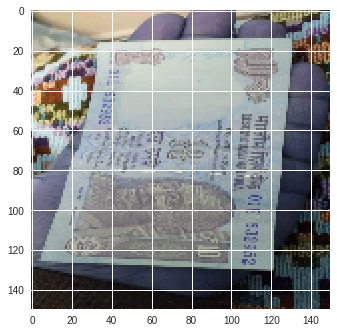

In [98]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()


In [99]:
new_array.shape

(150, 150, 3)

In [0]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category) 

        for img in os.listdir(path):  
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                #print([new_array, class_num])
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_training_data()


In [101]:

print(training_data[1][0].shape)
print(len(training_data))

(150, 150, 3)
56


In [0]:

import random

random.shuffle(training_data)
#print(training_data[1])

In [0]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [0]:
X = np.array(X).astype('float32')
X /= 255.0


In [105]:
print(X[1].shape)

(150, 150, 3)


In [0]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

"""
model.add(Conv2D(128, (3, 3), padding='same', input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.4))
"""
model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(len(CATEGORIES)))
model.add(Activation('softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [108]:
y = keras.utils.to_categorical(y, num_classes=len(CATEGORIES))
print(len(one_hot_labels))
model.fit(X,y ,
          batch_size=32,
          epochs=20
          )

56
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
56/56 [==============================] - 6s 104ms/step - loss: 3.3215 - acc: 0.5000
Epoch 2/20
56/56 [==============================] - 4s 78ms/step - loss: 3.5275 - acc: 0.6429
Epoch 3/20
56/56 [==============================] - 4s 76ms/step - loss: 1.5007 - acc: 0.4107
Epoch 4/20
56/56 [==============================] - 4s 76ms/step - loss: 1.2655 - acc: 0.3929
Epoch 5/20
56/56 [==============================] - 4s 76ms/step - loss: 1.0090 - acc: 0.5357
Epoch 6/20
56/56 [==============================] - 4s 77ms/step - loss: 0.9325 - acc: 0.5714
Epoch 7/20
56/56 [==============================] - 4s 77ms/step - loss: 0.9121 - acc: 0.5893
Epoch 8/20
56/56 [==============================] - 4s 77ms/step - loss: 0.8612 - acc: 0.5893
Epoch 9/20
56/56 [==============================] - 4s 77ms/step - loss: 0.7849 - acc: 0.5893
Epoch 10/20
56/56 [==============================] - 4s 77ms/step - loss: 0.7087 - acc: 0.5893
Epoch 1

In [0]:
model.save('64x3-CNN.model')


In [0]:
def prepare(filepath):
    IMG_SIZE = 256  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
    print(img_array)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # return the image with shaping that TF wants.

In [0]:
model = tf.keras.models.load_model("64x3-CNN.model")


In [118]:
from keras.preprocessing import image
import numpy as np
CATEGORIES = ['10','20','others']
img=image.load_img('trainnote/20/IMG-20190326-WA0041.jpg', target_size=(150, 150))#Because input to our model is (32,32,3) 
#load_img function loads image in jpeg format
img=image.img_to_array(img)#we have to convert Iage from Jpeg to numpy array
img=np.expand_dims(img,axis=0)#Adding extra dimension so that model can predict
print(img.shape)
print(CATEGORIES[int(model.predict_classes(img))])

(1, 150, 150, 3)
20
